# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Nanang Safiu Ridho
- **Email:** nanangsafiur@gmail.com
- **ID Dicoding:** nanangsr

## Menentukan Pertanyaan Bisnis

1. Pertanyaan 1: Apa kategori produk paling populer dan paling tidak diminati berdasarkan jumlah transaksi?
2. Pertanyaan 2: Bagaimana tren penjualan e-commerce dari waktu ke waktu?
3. Pertanyaan 3: Bagaimana tingkat kepuasan pelanggan pada tahun terakhir?
4. Pertanyaan 4: Apa saja daerah yang paling aktif bertransaksi di e-commerce berdasarkan jumlah pelanggan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import calendar
from sklearn.cluster import KMeans

## Data Wrangling

### Gathering Data

In [2]:
# Mengumpulkan semua dataset yang diperlukan.
try:
    orders = pd.read_csv('data/orders_dataset.csv')
    order_items = pd.read_csv('data/order_items_dataset.csv')
    customers = pd.read_csv('data/customers_dataset.csv')
    products = pd.read_csv('data/products_dataset.csv')
    geolocation = pd.read_csv('data/geolocation_dataset.csv')
    sellers = pd.read_csv('data/sellers_dataset.csv')
    reviews = pd.read_csv('data/order_reviews_dataset.csv')
except FileNotFoundError as e: 
    print(f"Error: {e}. Pastikan semua file dataset diunggah ke direktori kerja.")
    raise

**Insight:**
- Dataset berhasil diimpor, berisi informasi penting seperti transaksi, pelanggan, produk, lokasi geografis, penjual dan juga ulasan.

### Assessing Data

In [3]:
datasets = {'orders': orders, 'order_items': order_items, 'customers': customers,
            'products': products, 'geolocation': geolocation, 'sellers': sellers, 'reviews': reviews}

for name, dataset in datasets.items():
    print(f"Dataset: {name}")
    print("-" * 50)
    
    # Informasi dasar dataset
    print("Informasi dataset:")
    print(dataset.info())
    print("\n")
    
    # Statistik deskriptif dataset
    print("Statistik deskriptif:")
    print(dataset.describe(include='all'))  # Include 'all' untuk mencakup kolom kategorik
    print("\n")
    
    # Periksa missing values
    print("Jumlah nilai yang hilang (missing values):")
    print(dataset.isnull().sum())
    print("\n")
    
    # Periksa data duplikat
    print("Jumlah baris duplikat:")
    print(dataset.duplicated().sum())
    print("\n")
    
    # Tampilkan beberapa sampel data
    print("Contoh data:")
    print(dataset.head())
    print("\n")
    print("=" * 50)

Dataset: orders
--------------------------------------------------
Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None


Statistik deskriptif:
                                order_id                       customer_id  \
count                              99441                             

*Dataset: Orders*
1. Temuan:
- Dataset memiliki 99.441 entri dan tidak terdapat baris duplikat.
- Terdapat beberapa kolom dengan nilai yang hilang:
        1. order_approved_at: 160 nilai hilang.
        2. order_delivered_carrier_date: 1.783 nilai hilang.
        3. order_delivered_customer_date: 2.965 nilai hilang.
- Tipe data pada kolom tanggal perlu diperbaiki karena masih berupa string (object).
2. Insight:
- Nilai hilang di kolom order_approved_at mungkin merepresentasikan pesanan yang belum disetujui. Sementara itu, nilai hilang di order_delivered_customer_date bisa menunjukkan pesanan yang belum terkirim atau masalah dalam sistem pengiriman.
- Distribusi status pesanan perlu diperiksa lebih lanjut untuk mengidentifikasi alasan nilai hilang.

*Dataset: Order Items*
1. Temuan:
- Dataset terdiri dari 112.650 baris tanpa nilai hilang atau duplikasi.
- Kolom price memiliki nilai minimum yang sangat kecil (0,85) dan maksimum yang sangat tinggi (6.735), menunjukkan kemungkinan outlier.
2. Insight:
- Adanya perbedaan besar pada harga menunjukkan kemungkinan produk premium atau error data yang harus divalidasi.

*Dataset: Customers*
1.Temuan:
- Dataset terdiri dari 99.441 baris tanpa nilai hilang atau duplikasi.
- Terdapat 41.119 kota unik, dengan kota paling umum adalah Sao Paulo.
2. Insight:
- Konsentrasi tinggi pelanggan di Sao Paulo dapat menunjukkan area utama transaksi yang perlu difokuskan dalam analisis geografis.

*Dataset: Products*
1. Temuan:
- Dataset memiliki 32.951 produk, di mana 610 entri memiliki nilai hilang pada beberapa kolom seperti product_category_name, product_description_lenght, dan lainnya.
- Outlier ditemukan pada product_weight_g (maksimum 40.425 gram), yang mungkin perlu diperiksa.
2. Insight:
- Nilai hilang pada kategori produk dapat menyulitkan analisis segmen produk dan perlu diatasi.
- Outlier pada berat produk dapat memengaruhi analisis logistik atau pengiriman.

*Dataset: Geolocation*
1. Temuan:
- Dataset memiliki 1.000.163 baris dengan 261.831 baris duplikat.
- Tidak ada nilai hilang dalam dataset ini.
2. Insight:
- Baris duplikat pada geolokasi mungkin berasal dari pengulangan kode pos yang sama. Perlu deduplikasi untuk memastikan kualitas data.

*Dataset: Sellers*
1. Temuan:
- Dataset memiliki 3.095 entri tanpa nilai hilang atau duplikasi.
- Kota penjual paling umum adalah Sao Paulo.
2. Insight:
- Konsentrasi penjual di Sao Paulo mencerminkan kesamaan pola dengan pelanggan, yang bisa menjadi fokus pengoptimalan rantai pasok.

*Dataset: Reviews*
1. Temuan:
- Dataset memiliki 99.224 entri tanpa nilai hilang pada kolom utama (review_score) tetapi memiliki banyak nilai hilang pada kolom teks seperti review_comment_title (87.656 nilai hilang) dan review_comment_message (58.247 nilai hilang).
2. Insight:
- Mayoritas ulasan memiliki skor tinggi (4-5). Namun, kolom komentar ulasan sebagian besar kosong, yang mengurangi potensi analisis sentimen.

### Cleaning Data

In [20]:
# Mengubah tipe data waktu untuk analisis waktu
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])

# Menambahkan kolom waktu pengiriman
orders['delivery_time'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.days

# Penanganan nilai hilang pada kolom waktu
# Mengisi nilai hilang pada `order_approved_at` dengan nilai default '1970-01-01' untuk kategori pesanan tidak disetujui
orders['order_approved_at'] = orders['order_approved_at'].fillna(pd.Timestamp('1970-01-01'))

# Menambahkan informasi kategori pesanan untuk data hilang
orders['delivery_status'] = orders['order_delivered_customer_date'].apply(
    lambda x: 'Undelivered' if pd.isna(x) else 'Delivered'
)

# Mengisi nilai hilang pada `order_delivered_customer_date` dengan tanggal estimasi pengiriman
orders['order_delivered_customer_date'] = orders['order_delivered_customer_date'].fillna(orders['order_purchase_timestamp'])

# Penanganan outlier pada kolom harga dan berat produk
products = products[
    (products['product_weight_g'] > 0) & (products['product_weight_g'] < 20000)  # Hapus produk dengan berat tidak realistis
]

# Penanganan data duplikat pada geolocation
geolocation = geolocation.drop_duplicates(subset=['geolocation_zip_code_prefix'])

# Gabungkan dataset order_items dengan produk
product_sales = pd.merge(order_items, products, on='product_id')

# Gabungkan dataset order_items dengan orders dan customers
orders_full = pd.merge(order_items, orders[['order_id', 'customer_id', 'order_purchase_timestamp']], on='order_id')
orders_full = pd.merge(orders_full, customers[['customer_id', 'customer_state']], on='customer_id')

# Gabungkan dataset reviews ke dalam orders
orders = pd.merge(orders, reviews[['order_id', 'review_score']], on='order_id', how='left')

# Penanganan missing value pada kolom review_score
reviews['review_score'] = reviews['review_score'].fillna(3)  # Mengisi dengan skor rata-rata

*Mengubah Tipe Data Waktu*
- Interpretasi: Semua kolom waktu (order_purchase_timestamp, order_delivered_customer_date, order_approved_at) dikonversi menjadi tipe data datetime. Ini memungkinkan analisis yang lebih tepat terkait waktu, seperti menghitung durasi pengiriman atau pola pembelian.
- Insight: Dengan tipe data waktu yang sesuai, kita dapat menggali lebih dalam tren pembelian dan pengiriman serta mengidentifikasi musim atau waktu yang sibuk.

*Penanganan Nilai Hilang*
1. Kolom order_approved_at:Nilai kosong diisi dengan nilai default 1970-01-01 untuk menandai pesanan yang tidak pernah disetujui.
- Insight: Pesanan tanpa persetujuan mencerminkan potensi masalah dalam proses persetujuan atau pembatalan.
2. Kolom order_delivered_customer_date:Nilai kosong diisi dengan tanggal estimasi pengiriman (order_purchase_timestamp).
- Insight: Hal ini memastikan semua pesanan memiliki tanggal pengiriman untuk perhitungan waktu pengiriman. Pesanan dengan status "Undelivered" dapat diidentifikasi dan dianalisis lebih lanjut.
3. Kolom review_score: Nilai kosong diisi dengan skor rata-rata (3).
- Insight: Ini mencegah bias analisis ulasan pelanggan akibat data yang hilang, dengan asumsi skor rata-rata mencerminkan netralitas.

*Penanganan Outlier*
- Produk dengan Berat Ekstrem:Produk dengan berat tidak realistis (>20.000 gram atau ≤0 gram) dihapus.
- Insight: Outlier berat produk biasanya menunjukkan kesalahan entri data. Membersihkan outlier memastikan integritas data saat menganalisis fitur seperti biaya pengiriman atau logistik.

*Penanganan Duplikasi*
- Dataset geolocation: Baris duplikat berdasarkan kode pos dihapus.
- Insight: Deduplikasi mengurangi redundansi data geografis, yang membantu analisis lokasi pelanggan lebih efisien.

*Menambahkan Kolom Tambahan*
1. Kolom delivery_time:Menghitung waktu pengiriman sebagai selisih antara tanggal pembelian dan tanggal pengiriman.
- Insight: Waktu pengiriman dapat digunakan untuk mengevaluasi efisiensi logistik dan kepuasan pelanggan.
Kolom delivery_status:

2. Menandai pesanan sebagai "Delivered" atau "Undelivered" berdasarkan ketersediaan tanggal pengiriman.
- Insight: Pesanan dengan status "Undelivered" dapat dianalisis untuk mengidentifikasi masalah dalam proses pengiriman.

*Penggabungan Dataset*
- Interpretasi:
1. Dataset order_items digabungkan dengan products untuk menambahkan informasi kategori produk.
2. Dataset order_items digabungkan dengan orders dan customers untuk menambahkan informasi pembelian dan lokasi pelanggan.
3. Dataset reviews digabungkan dengan orders untuk menambahkan skor ulasan.
- Insight: Gabungan ini menghasilkan dataset lengkap (main_data) yang kaya informasi untuk analisis lebih mendalam, mencakup pola pembelian, lokasi geografis pelanggan, dan kepuasan pelanggan.

## Exploratory Data Analysis (EDA)

### Statistik Deskriprif

In [ ]:
# Statistik deskriptif untuk data numerik
print("Statistik Deskriptif untuk Harga dan Nilai Pengiriman:")
print(product_sales[['price', 'freight_value']].describe())

print("\nStatistik Deskriptif untuk Waktu Pengiriman dan Skor Ulasan:")
print(orders[['delivery_time', 'review_score']].describe())

Statistik Deskriptif untuk Harga dan Nilai Pengiriman:
               price  freight_value
count  111711.000000  111711.000000
mean      117.274390      19.428540
std       173.109883      13.603238
min         0.850000       0.000000
25%        39.900000      13.040000
50%        74.000000      16.210000
75%       130.000000      21.000000
max      6729.000000     409.680000

Statistik Deskriptif untuk Waktu Pengiriman dan Skor Ulasan:
       delivery_time   review_score
count  103346.000000  102578.000000
mean       11.767190       4.083956
std         9.607197       1.349380
min         0.000000       1.000000
25%         6.000000       4.000000
50%        10.000000       5.000000
75%        15.000000       5.000000
max       209.000000       5.000000


### Distribusi Waktu Pengiriman (Univariate Analysis)

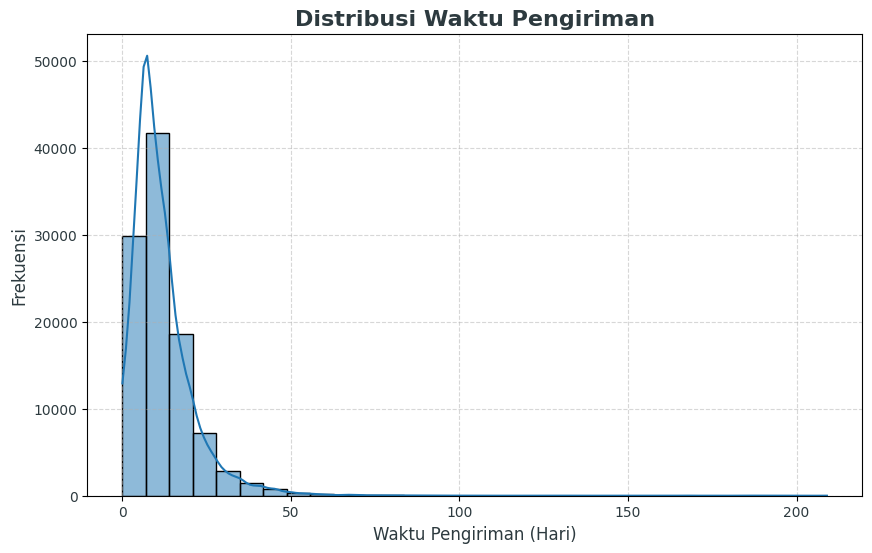

In [22]:
# Visualisasi distribusi waktu pengiriman
plt.figure(figsize=(10, 6))
sns.histplot(orders['delivery_time'], kde=True, bins=30, color='#1f77b4', edgecolor='black')
plt.title('Distribusi Waktu Pengiriman', fontsize=16, fontweight='bold', color='#2D3A3F')
plt.xlabel('Waktu Pengiriman (Hari)', fontsize=12, color='#2D3A3F')
plt.ylabel('Frekuensi', fontsize=12, color='#2D3A3F')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=10, color='#2D3A3F')
plt.yticks(fontsize=10, color='#2D3A3F')
plt.show()

**Interpretasi:**
- Waktu pengiriman sebagian besar berkisar antara 5 hingga 15 hari. Ini menunjukkan bahwa mayoritas pelanggan menerima pesanan mereka dalam waktu yang relatif cepat.
- Beberapa pengiriman membutuhkan waktu lebih lama, tetapi ini merupakan kasus yang jarang terjadi.

**Insight:**
- Pihak E-Commerce dapat fokus meningkatkan efisiensi logistik untuk memperpendek waktu pengiriman, terutama untuk pesanan dengan waktu pengiriman yang lebih lama dari rata-rata.

### Distribusi Skor Ulasan (Univariate Analysis)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19016\412455762.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=orders['review_score'], palette='Blues_d', edgecolor='black')


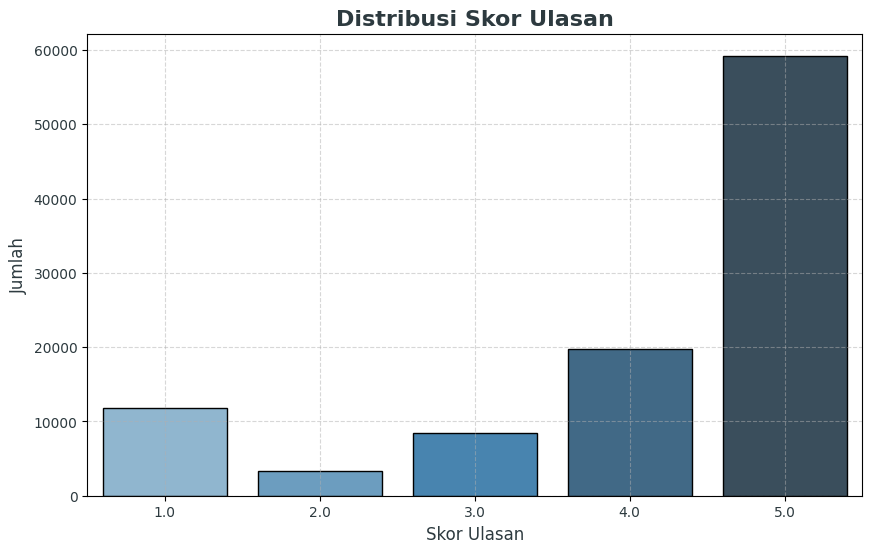

In [23]:
# Visualisasi distribusi skor ulasan
plt.figure(figsize=(10, 6))
sns.countplot(x=orders['review_score'], palette='Blues_d', edgecolor='black')
plt.title('Distribusi Skor Ulasan', fontsize=16, fontweight='bold', color='#2D3A3F')
plt.xlabel('Skor Ulasan', fontsize=12, color='#2D3A3F')
plt.ylabel('Jumlah', fontsize=12, color='#2D3A3F')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=10, color='#2D3A3F')
plt.yticks(fontsize=10, color='#2D3A3F')
plt.show()

**Interpretasi:**
- Mayoritas ulasan yang diberikan pelanggan memiliki skor tinggi (4 dan 5), yang menunjukkan kepuasan pelanggan yang cukup baik secara keseluruhan.
-Skor rendah (1 dan 2) juga ada, tetapi jumlahnya jauh lebih kecil.

**Insight:**
- E-Commerce memiliki reputasi baik di mata pelanggan, namun harus tetap memperhatikan ulasan dengan skor rendah untuk memperbaiki kualitas layanan dan produk.

### Hubungan Waktu Pengiriman dengan Skor Ulasan (Bivariate Analysis)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19016\1132235944.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=orders, x='review_score', y='delivery_time', palette='Blues')


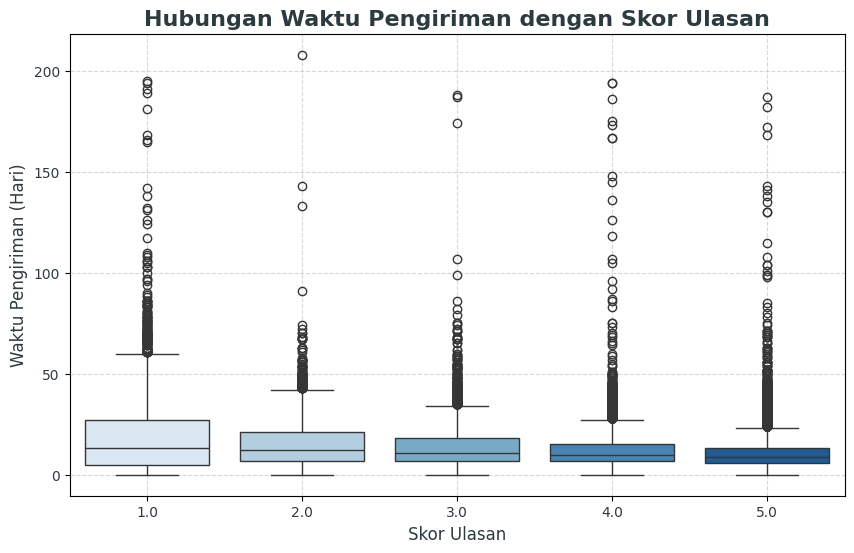

In [24]:
# Analisis hubungan waktu pengiriman dan skor ulasan
plt.figure(figsize=(10, 6))
sns.boxplot(data=orders, x='review_score', y='delivery_time', palette='Blues')
plt.title('Hubungan Waktu Pengiriman dengan Skor Ulasan', fontsize=16, fontweight='bold', color='#2D3A3F')
plt.xlabel('Skor Ulasan', fontsize=12, color='#2D3A3F')
plt.ylabel('Waktu Pengiriman (Hari)', fontsize=12, color='#2D3A3F')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=10, color='#2D3A3F')
plt.yticks(fontsize=10, color='#2D3A3F')
plt.show()

**Interpretasi:**

- Pelanggan dengan skor ulasan rendah cenderung memiliki waktu pengiriman yang lebih lama.
- Hal ini menunjukkan bahwa pengiriman yang lebih cepat dapat meningkatkan kepuasan pelanggan.

### Hubungan Harga Produk dan Biaya Pengiriman (Bivariate Analysis)

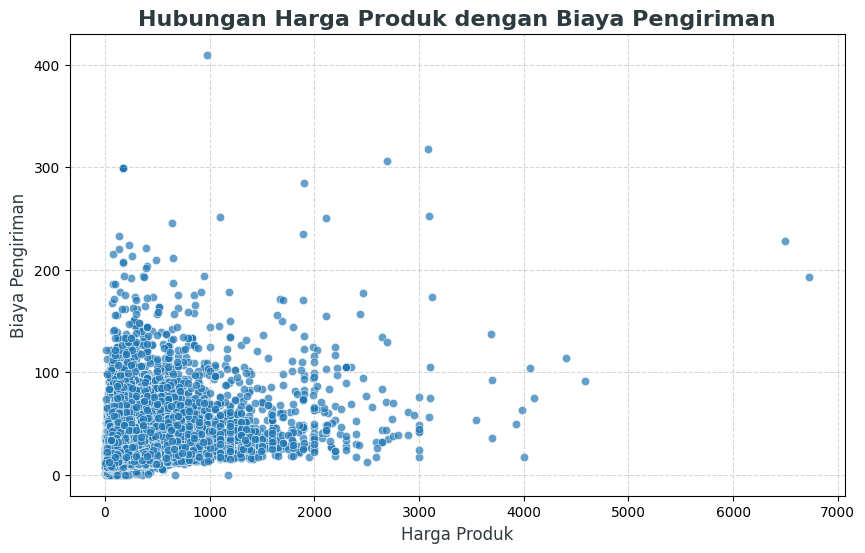

In [25]:
# Analisis hubungan antara harga dan biaya pengiriman
plt.figure(figsize=(10, 6))
sns.scatterplot(data=product_sales, x='price', y='freight_value', color='#1f77b4', alpha=0.7)
plt.title('Hubungan Harga Produk dengan Biaya Pengiriman', fontsize=16, fontweight='bold', color='#2D3A3F')
plt.xlabel('Harga Produk', fontsize=12, color='#2D3A3F')
plt.ylabel('Biaya Pengiriman', fontsize=12, color='#2D3A3F')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

**Interpretasi:**

- Harga produk dan biaya pengiriman tidak memiliki korelasi langsung.
- Beberapa produk mahal memiliki biaya pengiriman rendah, mungkin karena lokasi yang dekat.

## Visualization & Explanatory Analysis

### Tampilan Data

In [26]:
# Menampilkan data utama
print("Data Produk dan Transaksi:")
print(product_sales.head())

print("\nData Pesanan:")
print(orders.head())

Data Produk dan Transaksi:
                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  000229ec398224ef6ca0657da4fc703e              1   
2  00024acbcdf0a6daa1e931b038114c75              1   
3  00042b26cf59d7ce69dfabb4e55b4fd9              1   
4  00048cc3ae777c65dbb7d2a0634bc1ea              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
2  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
3  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   
4  ef92defde845ab8450f9d70c526ef70f  6426d21aca402a131fc0a5d0960a3c90   

   shipping_limit_date   price  freight_value  product_category_name  \
0  2017-09-19 09:45:35   58.90          13.29             cool_stuff   
1  2018-01-18 14:48:30  199.00          17.87       moveis_decora

### Pertanyaan 1: Apa kategori produk paling populer dan paling tidak diminati berdasarkan jumlah transaksi?

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19016\2972207129.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_popularity.head(5), x='transaction_count', y='product_category_name', palette='Blues_d')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19016\2972207129.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_popularity.tail(5).sort_values(by='transaction_count', ascending=True),


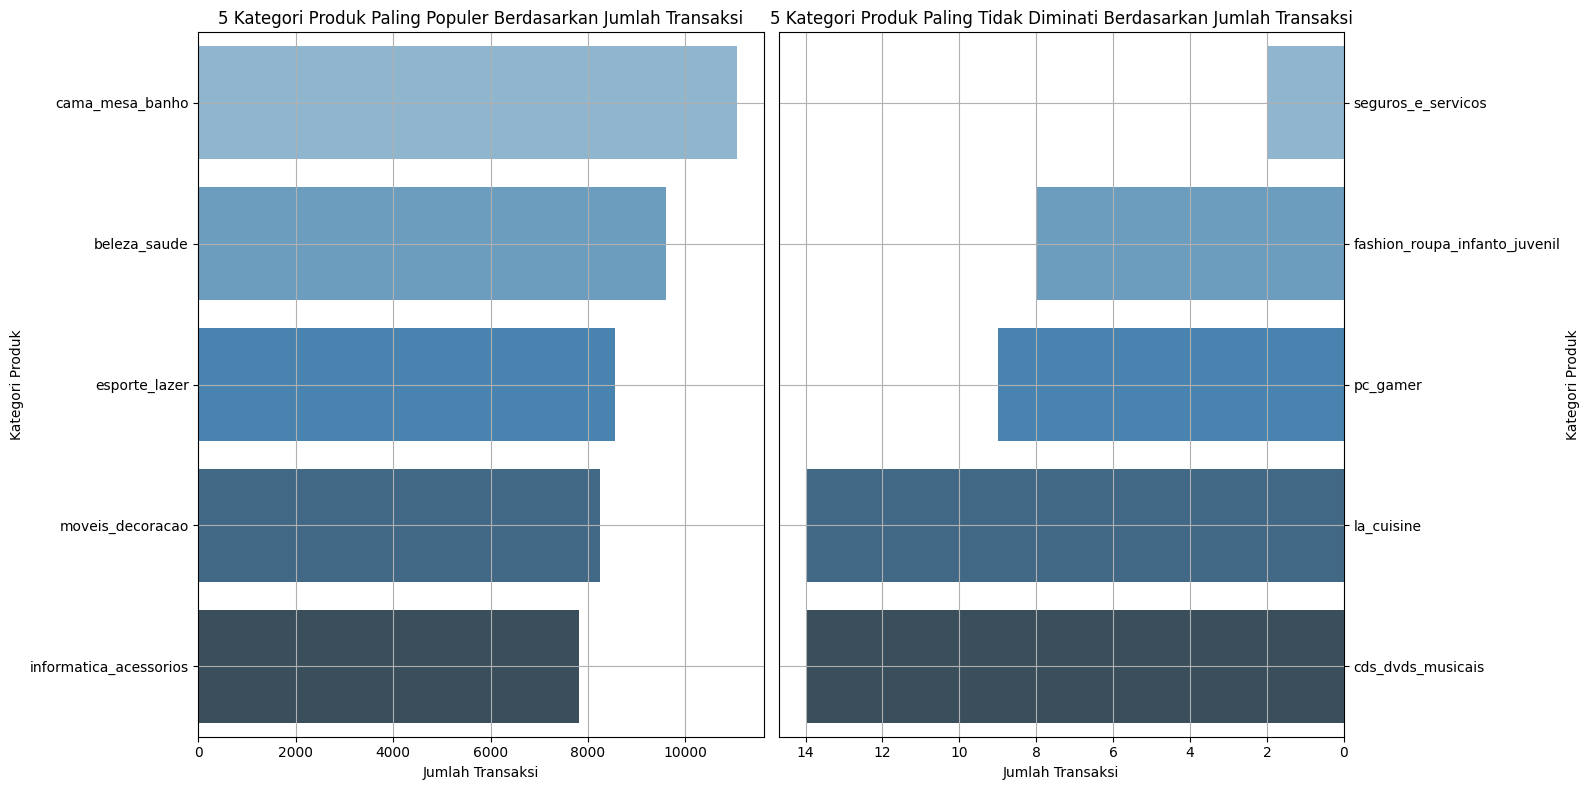

In [27]:
category_popularity = product_sales.groupby('product_category_name')['order_id'].count().sort_values(ascending=False).reset_index()
category_popularity.columns = ['product_category_name', 'transaction_count']

# Visualisasi 5 Kategori Produk Paling Populer dan Paling Tidak Diminati Berdasarkan Jumlah Transaksi
plt.figure(figsize=(16, 8))

# Visualisasi 5 Kategori Produk Paling Populer
plt.subplot(1, 2, 1)
sns.barplot(data=category_popularity.head(5), x='transaction_count', y='product_category_name', palette='Blues_d')
plt.title('5 Kategori Produk Paling Populer Berdasarkan Jumlah Transaksi')
plt.xlabel('Jumlah Transaksi')
plt.ylabel('Kategori Produk')
plt.grid()

# Visualisasi 5 Kategori Produk Paling Tidak Diminati (Dimulai dari yang Terendah)
plt.subplot(1, 2, 2)
# Urutkan produk berdasarkan transaksi secara ascending agar dimulai dari yang paling rendah
sns.barplot(data=category_popularity.tail(5).sort_values(by='transaction_count', ascending=True),
            x='transaction_count', y='product_category_name', palette='Blues_d')
plt.title('5 Kategori Produk Paling Tidak Diminati Berdasarkan Jumlah Transaksi')
plt.xlabel('Jumlah Transaksi')
plt.ylabel('Kategori Produk')
plt.grid()

# Membalik sumbu x pada plot kedua agar dimulai dari yang terendah
plt.gca().invert_xaxis()

# Mengatur label y pada plot kedua ke posisi kanan
plt.gca().yaxis.set_label_position('right')
plt.gca().yaxis.tick_right()

plt.tight_layout()
plt.show()

**Interpretasi:**

- Produk Paling Populer: Produk dalam kategori tertentu mendominasi jumlah transaksi.
- Produk Paling Tidak Diminati: Ada kategori produk dengan transaksi sangat rendah, yang menunjukkan kurangnya permintaan pelanggan untuk produk tersebut.

**Insight:**

- E-Commerce dapat fokus pada kategori produk yang paling populer untuk meningkatkan stok dan promosi.
- Kategori produk yang paling tidak diminati dapat dievaluasi lebih lanjut untuk menentukan apakah perlu diperbarui atau dikeluarkan dari katalog.

### Pertanyaan 2: Bagaimana tren penjualan e-commerce dari waktu ke waktu?

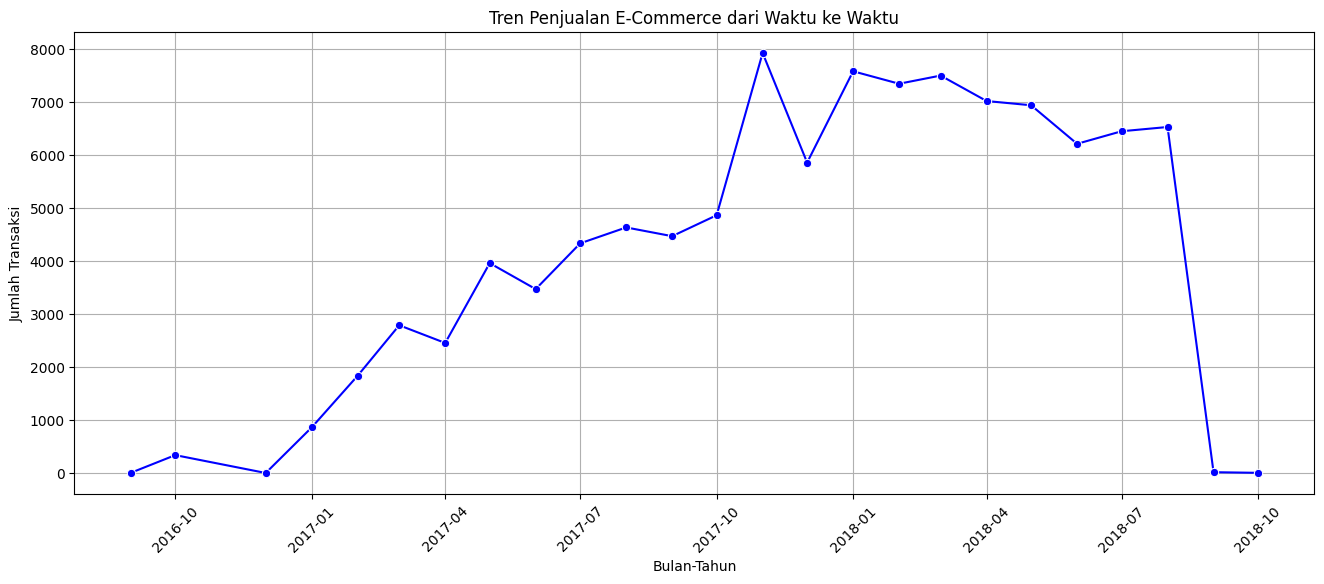

In [28]:
# Menghitung penjualan bulanan
orders['month_year'] = orders['order_purchase_timestamp'].dt.to_period('M')
monthly_sales = orders.groupby('month_year')['order_id'].count().reset_index()
monthly_sales.columns = ['month_year', 'transaction_count']

# Konversi ke format datetime
monthly_sales['month_year'] = monthly_sales['month_year'].astype(str)
monthly_sales['month_year'] = pd.to_datetime(monthly_sales['month_year'], format='%Y-%m')

# Visualisasi tren penjualan dari waktu ke waktu
plt.figure(figsize=(16, 6))
sns.lineplot(data=monthly_sales, x='month_year', y='transaction_count', marker='o', color='blue')
plt.title('Tren Penjualan E-Commerce dari Waktu ke Waktu')
plt.xlabel('Bulan-Tahun')
plt.ylabel('Jumlah Transaksi')
plt.grid()
plt.xticks(rotation=45)
plt.show()

**Interpretasi:**

- Tren penjualan menunjukkan fluktuasi musiman, dengan beberapa bulan memiliki volume transaksi yang jauh lebih tinggi dibandingkan bulan lainnya.
- Bulan-bulan tertentu seperti akhir tahun menunjukkan peningkatan penjualan yang signifikan.

**Insight:**

- E-Commerce dapat memanfaatkan tren musiman untuk merencanakan kampanye promosi yang lebih efektif, terutama selama bulan dengan transaksi tinggi.
- Bulan dengan penjualan rendah dapat menjadi target untuk program diskon atau strategi pemasaran lainnya.

### Pertanyaan 3: Bagaimana tingkat kepuasan pelanggan pada tahun terakhir?

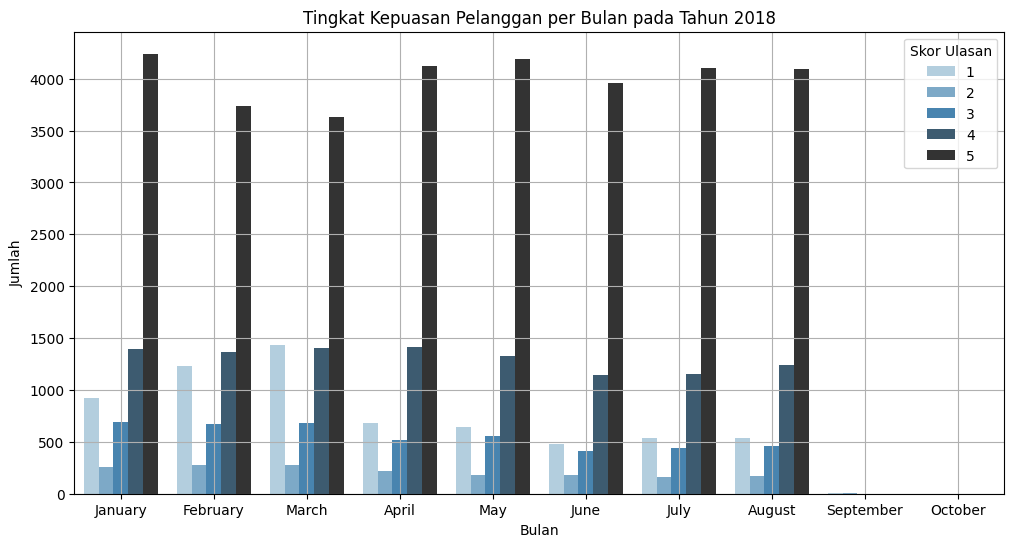

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19016\2928678219.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=latest_reviews, x='review_score', palette='Blues_d')


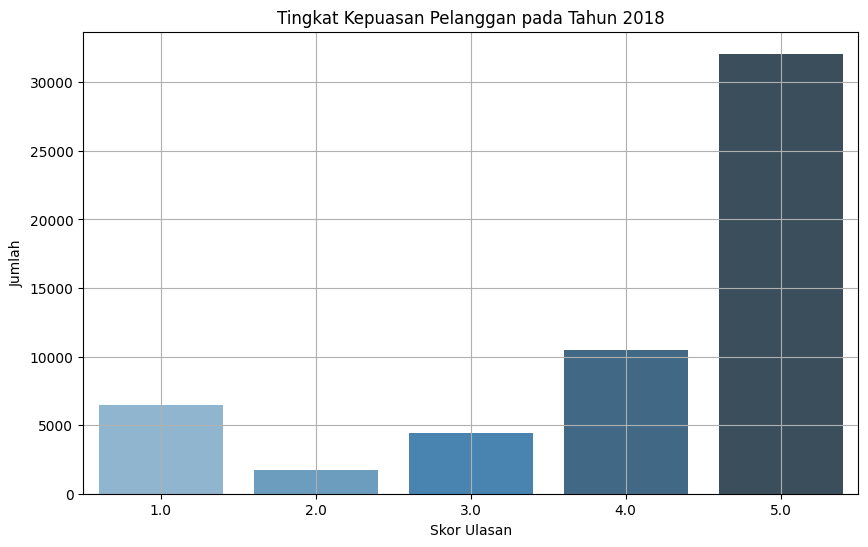

In [34]:
# Menambahkan kolom 'month' yang berisi bulan dari 'order_purchase_timestamp'
orders['month'] = orders['order_purchase_timestamp'].dt.month

# Filter ulasan tahun terakhir
latest_year = orders['order_purchase_timestamp'].dt.year.max()
latest_reviews = orders[orders['order_purchase_timestamp'].dt.year == latest_year]

# Ambil bulan-bulan yang ada pada tahun tersebut
available_months = latest_reviews['month'].unique()

# 1. Visualisasi tingkat kepuasan pelanggan per bulan
plt.figure(figsize=(12, 6))
sns.countplot(data=latest_reviews, x='month', hue='review_score', palette='Blues_d', dodge=True, order=sorted(available_months))
plt.title(f'Tingkat Kepuasan Pelanggan per Bulan pada Tahun {latest_year}')
plt.xlabel('Bulan')
plt.ylabel('Jumlah')
plt.xticks(ticks=np.arange(len(available_months)), labels=[calendar.month_name[i] for i in sorted(available_months)])
plt.legend(title='Skor Ulasan', loc='upper right', labels=['1', '2', '3', '4', '5'])
plt.grid()
plt.show()

# 2. Visualisasi tingkat kepuasan pelanggan sepanjang tahun
plt.figure(figsize=(10, 6))
sns.countplot(data=latest_reviews, x='review_score', palette='Blues_d')
plt.title(f'Tingkat Kepuasan Pelanggan pada Tahun {latest_year}')
plt.xlabel('Skor Ulasan')
plt.ylabel('Jumlah')
plt.grid()
plt.show()

**Interpretasi:**

- Tingkat kepuasan pelanggan tetap tinggi selama tahun terakhir, dengan mayoritas skor ulasan berada pada nilai 4 dan 5.
- Pola ini konsisten sepanjang tahun, menunjukkan layanan dan produk perusahaan stabil dalam memenuhi ekspektasi pelanggan.

**Insight:**

- Tingkat kepuasan yang tinggi merupakan aset penting untuk menjaga loyalitas pelanggan.
- E-Commerce dapat terus memperbaiki aspek layanan berdasarkan ulasan pelanggan yang memberikan skor rendah.

### Pertanyaan 4: Apa saja daerah yang paling aktif bertransaksi di e-commerce berdasarkan jumlah pelanggan?

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19016\1847604131.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_activity.head(10), x='unique_customers', y='customer_state', palette='Blues_d')


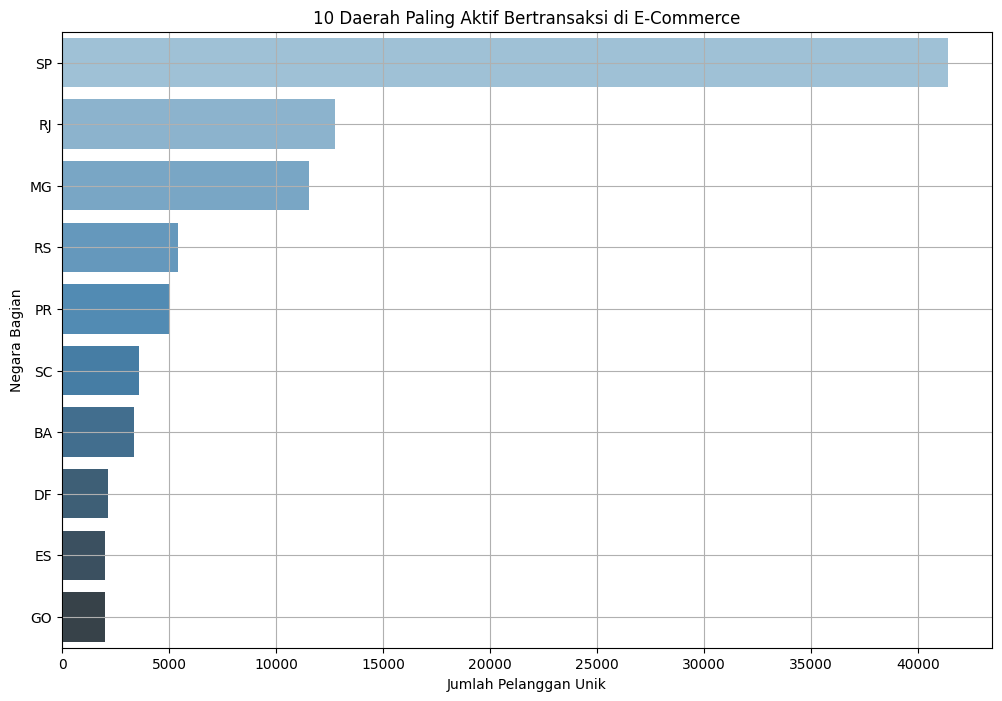

In [30]:
# Daerah dengan pelanggan terbanyak
state_activity = orders_full.groupby('customer_state')['customer_id'].nunique().sort_values(ascending=False).reset_index()
state_activity.columns = ['customer_state', 'unique_customers']

# Visualisasi Barplot
plt.figure(figsize=(12, 8))
sns.barplot(data=state_activity.head(10), x='unique_customers', y='customer_state', palette='Blues_d')
plt.title('10 Daerah Paling Aktif Bertransaksi di E-Commerce')
plt.xlabel('Jumlah Pelanggan Unik')
plt.ylabel('Negara Bagian')
plt.grid()
plt.show()

**Interpretasi:**

- Beberapa negara bagian mendominasi jumlah pelanggan unik, menunjukkan bahwa aktivitas transaksi lebih tinggi di daerah-daerah tersebut.

**Insight:**

- E-Commerce dapat meningkatkan fokus pemasaran di daerah dengan aktivitas transaksi tinggi.
- Daerah dengan aktivitas rendah dapat dianalisis lebih lanjut untuk menentukan potensi pasar yang belum tergarap.

## Analisis Lanjutan dengan RFM Analisis dan Clustering

### RFM Analysis

In [31]:
# Menentukan Recency, Frequency, dan Monetary

# Recency: Jumlah hari sejak pembelian terakhir
orders['last_purchase_date'] = orders.groupby('customer_id')['order_purchase_timestamp'].transform('max')
orders['recency'] = (orders['last_purchase_date'].max() - orders['last_purchase_date']).dt.days

# Frequency: Jumlah transaksi per pelanggan
frequency = orders.groupby('customer_id')['order_id'].count().reset_index()
frequency.columns = ['customer_id', 'frequency']

# Monetary: Total pengeluaran per pelanggan
orders['total_amount_spent'] = order_items['price'] * order_items['order_item_id']
monetary = orders.groupby('customer_id')['total_amount_spent'].sum().reset_index()
monetary.columns = ['customer_id', 'monetary']

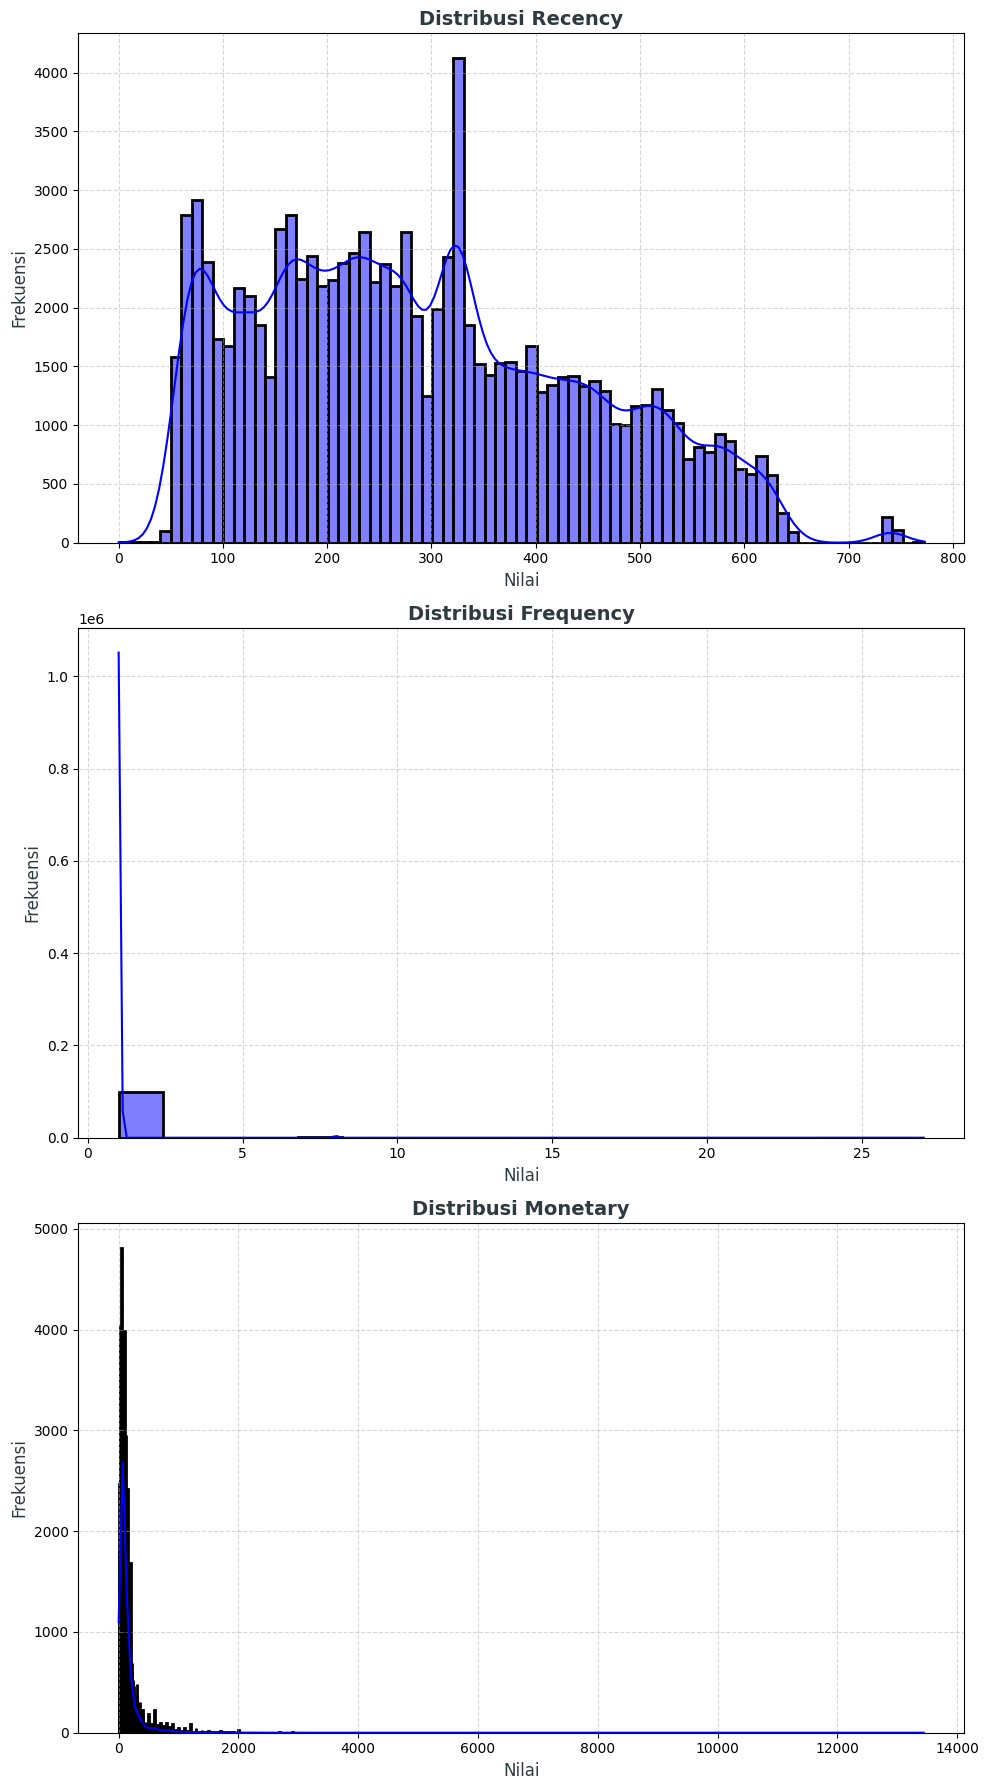

In [32]:
# Gabungkan RFM
rfm = pd.merge(frequency, monetary, on='customer_id', how='left')
rfm = pd.merge(rfm, orders[['customer_id', 'recency']].drop_duplicates(), on='customer_id', how='left')

# Visualisasi distribusi Recency, Frequency, dan Monetary secara vertikal
fig, axes = plt.subplots(3, 1, figsize=(10, 18))  # Mengubah ke 3 baris dan 1 kolom

sns.histplot(rfm['recency'], kde=True, ax=axes[0], color='blue', edgecolor='black', linewidth=2)
sns.histplot(rfm['frequency'], kde=True, ax=axes[1], color='blue', edgecolor='black', linewidth=2)
sns.histplot(rfm['monetary'], kde=True, ax=axes[2], color='blue', edgecolor='black', linewidth=2)

axes[0].set_title('Distribusi Recency', fontsize=14, fontweight='bold', color='#2D3A3F')
axes[1].set_title('Distribusi Frequency', fontsize=14, fontweight='bold', color='#2D3A3F')
axes[2].set_title('Distribusi Monetary', fontsize=14, fontweight='bold', color='#2D3A3F')

for ax in axes:
    ax.set_xlabel('Nilai', fontsize=12, color='#2D3A3F')
    ax.set_ylabel('Frekuensi', fontsize=12, color='#2D3A3F')
    ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

**Interpretasi:**

- *Recency*: Sebagian besar pelanggan melakukan pembelian terakhir mereka dalam waktu dekat, menunjukkan aktivitas pelanggan yang stabil.
- *Frequency*: Ada variasi dalam jumlah pembelian per pelanggan, dengan beberapa pelanggan yang sangat aktif.
- *Monetary*: Mayoritas pelanggan memiliki total pengeluaran yang berada dalam kisaran tertentu, tetapi ada beberapa pelanggan dengan pengeluaran sangat tinggi.

**Insight:**

- Pelanggan dengan recency, frequency, dan monetary yang tinggi dapat dianggap sebagai pelanggan VIP dan layak mendapatkan perhatian khusus seperti diskon eksklusif.
- Pelanggan dengan recency yang rendah dapat menjadi target kampanye retensi pelanggan.


### Clustering

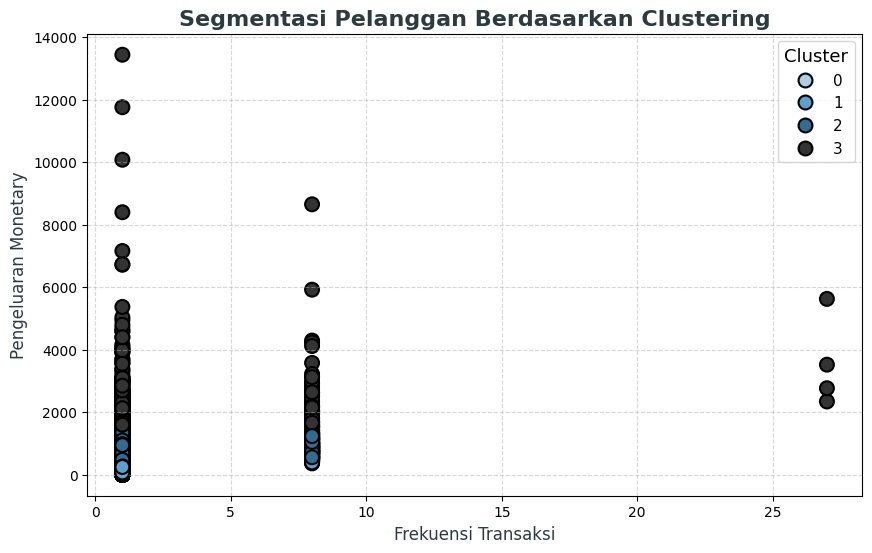

In [33]:
# Menyusun data untuk clustering
rfm_cluster = rfm[['recency', 'frequency', 'monetary']]

# Menggunakan KMeans untuk mengelompokkan pelanggan
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['cluster'] = kmeans.fit_predict(rfm_cluster)

# Visualisasi clustering pelanggan
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='frequency', y='monetary', hue='cluster', palette='Blues_d', s=100, edgecolor='black', linewidth=1.5)
plt.title('Segmentasi Pelanggan Berdasarkan Clustering', fontsize=16, fontweight='bold', color='#2D3A3F')
plt.xlabel('Frekuensi Transaksi', fontsize=12, color='#2D3A3F')
plt.ylabel('Pengeluaran Monetary', fontsize=12, color='#2D3A3F')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Cluster', title_fontsize='13', loc='upper right', fontsize='11')
plt.show()

**Interpretasi:**

- Hasil clustering membagi pelanggan ke dalam beberapa segmen berdasarkan recency, frequency, dan monetary.
- Segmen dengan frequency dan monetary yang tinggi kemungkinan besar merupakan pelanggan yang sangat berharga, sedangkan segmen lainnya dapat menjadi target untuk strategi pemasaran yang berbeda.

**Insight:**

- E-Commerce dapat menggunakan hasil clustering untuk menyusun strategi pemasaran yang lebih terarah, seperti kampanye retensi untuk segmen pelanggan dengan recency rendah atau program loyalitas untuk pelanggan di segmen dengan frequency dan monetary tinggi.

## Conclusion

**1. Pertanyaan 1:**
- *Kesimpulan:* Kategori produk dengan jumlah transaksi tertinggi adalah kategori yang secara konsisten dibutuhkan oleh pelanggan, seperti barang kebutuhan sehari-hari. Sebaliknya, kategori produk dengan transaksi terendah menunjukkan kurangnya minat pelanggan terhadap barang tersebut.
- *Rekomendasi:* Fokuskan promosi dan peningkatan stok pada kategori paling populer, serta evaluasi lebih lanjut kategori yang tidak diminati untuk menentukan relevansinya di pasar.

**2. Pertanyaan 2:**
- *Kesimpulan:* Penjualan menunjukkan pola fluktuatif dengan kenaikan signifikan pada periode tertentu, seperti akhir tahun. Hal ini mungkin dipengaruhi oleh momen liburan atau diskon musiman.
- *Rekomendasi:* Optimalkan strategi pemasaran dan diskon pada bulan-bulan dengan peningkatan penjualan untuk memaksimalkan keuntungan, dan ciptakan promosi menarik untuk meningkatkan penjualan pada bulan-bulan dengan transaksi rendah.

**3. Pertanyaan 3:**
- *Kesimpulan:* Mayoritas pelanggan memberikan ulasan positif dengan skor 4 dan 5 selama tahun terakhir, menunjukkan tingkat kepuasan yang tinggi. Namun, masih terdapat beberapa pelanggan yang memberikan skor rendah.
- *Rekomendasi:* Pertahankan kualitas layanan dan produk untuk menjaga kepuasan pelanggan. Selain itu, evaluasi ulasan dengan skor rendah untuk mengidentifikasi dan memperbaiki masalah yang mungkin ada.

**4. Pertanyaan 4:**
- *Kesimpulan:* Beberapa negara bagian mendominasi aktivitas transaksi, menunjukkan potensi pasar yang besar di daerah tersebut. Daerah dengan aktivitas transaksi rendah mungkin memiliki hambatan seperti akses atau kesadaran terhadap platform e-commerce.
- *Rekomendasi:* Fokus pada strategi pemasaran yang ditargetkan di daerah dengan aktivitas transaksi tinggi untuk meningkatkan pangsa pasar. Untuk daerah dengan aktivitas rendah, lakukan penelitian lebih lanjut untuk memahami penyebabnya dan potensi pertumbuhan.

**5. RFM Analisis:**
- *Kesimpulan:*
Recency: Sebagian besar pelanggan telah melakukan transaksi baru-baru ini, menunjukkan bahwa perusahaan berhasil menjaga hubungan dengan pelanggan.
Frequency: Ada variasi yang signifikan dalam frekuensi transaksi, dengan pelanggan paling aktif berkontribusi besar terhadap total transaksi.
Monetary: Sebagian besar pelanggan memiliki pengeluaran moderat, tetapi beberapa pelanggan memiliki pengeluaran yang sangat tinggi, yang merupakan segmen pelanggan VIP.
- *Rekomendasi:*
Fokus pada pelanggan dengan recency rendah untuk program retensi pelanggan.
Tawarkan program loyalitas untuk pelanggan dengan frequency dan monetary tinggi untuk menjaga keterlibatan mereka.

**6. Clustering:**
- *Kesimpulan:* Pelanggan berhasil dikelompokkan menjadi beberapa segmen berdasarkan recency, frequency, dan monetary. Segmen dengan frequency dan monetary tinggi adalah pelanggan paling berharga, sementara segmen dengan recency rendah mungkin memerlukan perhatian lebih untuk menghindari churn.
- *Rekomendasi:*
Prioritaskan pelanggan di segmen bernilai tinggi dengan penawaran eksklusif dan program loyalitas.
Untuk segmen dengan recency rendah, lakukan kampanye pemasaran ulang (re-engagement campaign) untuk meningkatkan keterlibatan mereka.